In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
data=pd.read_csv('/content/Dataset  (1).csv')

In [28]:
data['Cuisines'] = data['Cuisines'].fillna(data['Cuisines'].mode()[0])

In [29]:
# Count the number of cuisines in each row to make a new feature that can be used in modelling.
data['Cuisine count'] = data['Cuisines'].dropna().apply(lambda x: len(x.split(',')))
data[['Cuisines', 'Cuisine count']].head()


,Cuisines,Cuisine count
0,"French, Japanese, Desserts",3
1,Japanese,1
2,"Seafood, Asian, Filipino, Indian",4
3,"Japanese, Sushi",2
4,"Japanese, Korean",2


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# ***Task: Predictive Modeling***


Build a regression model to predict theaggregate rating of a restaurant based onavailable features.
Split the dataset into training and testing setsand evaluate the model's performance usingappropriate metrics.


In [31]:
from sklearn.preprocessing import LabelEncoder

# Encode binary categorical columns
label_encoder = LabelEncoder()
data['Has Table booking'] = label_encoder.fit_transform(data['Has Table booking'])
data['Has Online delivery'] = label_encoder.fit_transform(data['Has Online delivery'])

In [32]:
from sklearn.preprocessing import StandardScaler

features = ['Average Cost for two', 'Price range', 'Votes', 'Cuisine count', 'Has Table booking', 'Has Online delivery']
target = 'Aggregate rating'

# Separate features and target
X = data[features]
y = data[target]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.6669716391139746
R-squared: 0.26762222450194895


Experiment with different algorithms (e.g.,linear regression, decision trees, randomforest) and compare their performance.

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train each model and evaluate its performance
results = {}
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"MSE": mse, "R-squared": r2}

# Print results
print("Model Comparison Results:")
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']}, R-squared: {metrics['R-squared']}")


Model Comparison Results:
Linear Regression - MSE: 1.6669716391139746, R-squared: 0.26762222450194895
Decision Tree Regressor - MSE: 0.21945082840726907, R-squared: 0.9035850966093543
Random Forest Regressor - MSE: 0.12986578533279752, R-squared: 0.9429439513284732


Random Forest Regressor is the best performing model in this case, as it has the lowest MSE and the highest R-squared. It’s able to capture a larger portion of the variance in your data compared to Linear Regression and Decision Trees.

# ***Task: Customer Preference Analysis***


Analyze the relationship between the type ofcuisine and the restaurant's rating.
Determine if there are any specific cuisinesthat tend to receive higher ratings.


In [35]:
# Split cuisines, explode into separate rows
cuisine_ratings = data[['Cuisines', 'Aggregate rating']].dropna()
cuisine_ratings['Cuisines'] = cuisine_ratings['Cuisines'].str.split(',')
cuisine_ratings = cuisine_ratings.explode('Cuisines')

# Remove extra spaces
cuisine_ratings['Cuisines'] = cuisine_ratings['Cuisines'].str.strip()

# Compute average rating per cuisine
average_rating_by_cuisine = cuisine_ratings.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print(average_rating_by_cuisine.head(10))


Cuisines
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
D�_ner        4.400000
Bubble Tea    4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64


Identify the most popular cuisines amongcustomers based on the number of votes.


In [36]:
cuisine_votes = data[['Cuisines', 'Votes']].dropna()
cuisine_votes['Cuisines'] = cuisine_votes['Cuisines'].str.split(',')
cuisine_votes = cuisine_votes.explode('Cuisines')
cuisine_votes['Cuisines'] = cuisine_votes['Cuisines'].str.strip()

# Sum votes for each cuisine
cuisine_popularity = cuisine_votes.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print("Top 10 Most Popular Cuisines Based on Votes:")
print(cuisine_popularity.head(10))


Top 10 Most Popular Cuisines Based on Votes:
Cuisines
North Indian    598707
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64


# ***Task: Data Visualization***


Create visualizations to represent the distributionof ratings using different charts (histogram, barplot, etc.).


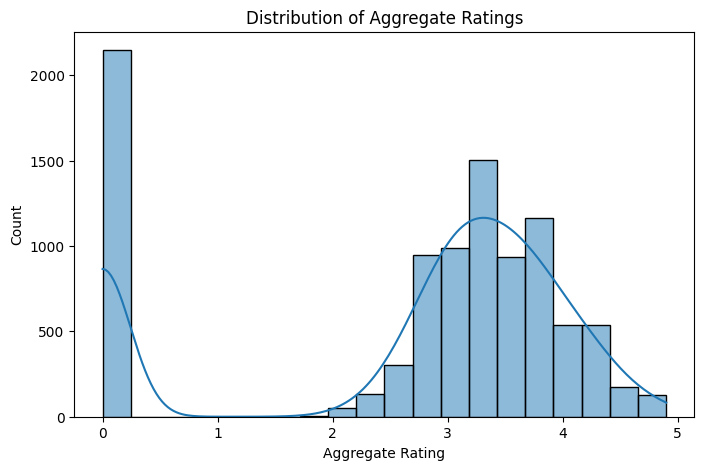

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Aggregate rating'], bins=20, kde=True)
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.title('Distribution of Aggregate Ratings')
plt.show()


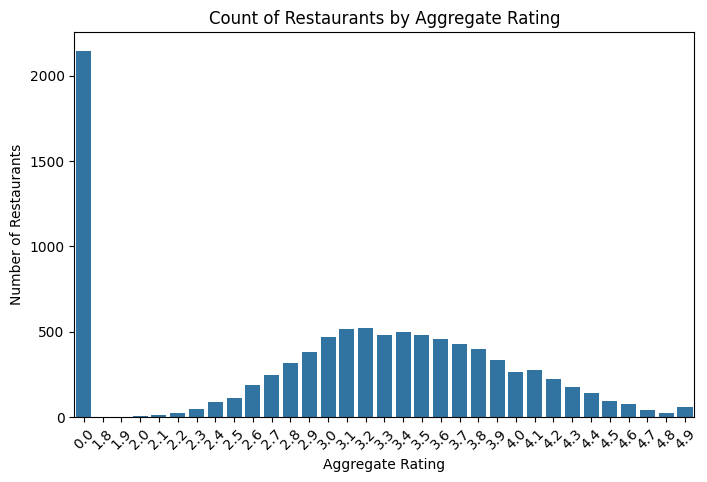

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Aggregate rating', data=data, order=sorted(data['Aggregate rating'].unique()))
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Count of Restaurants by Aggregate Rating')
plt.xticks(rotation=45)
plt.show()


Compare the average ratings of different cuisinesor cities using appropriate visualizations.


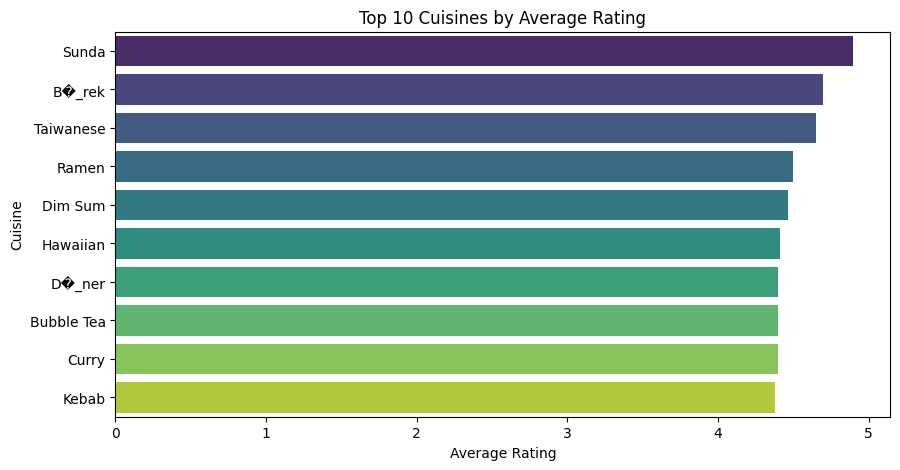

In [39]:
avg_rating_cuisine = average_rating_by_cuisine.head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, hue=avg_rating_cuisine.index, palette='viridis', legend=False)
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.title('Top 10 Cuisines by Average Rating')
plt.show()


Visualize the relationship between variousfeatures and the target variable to gain insights.

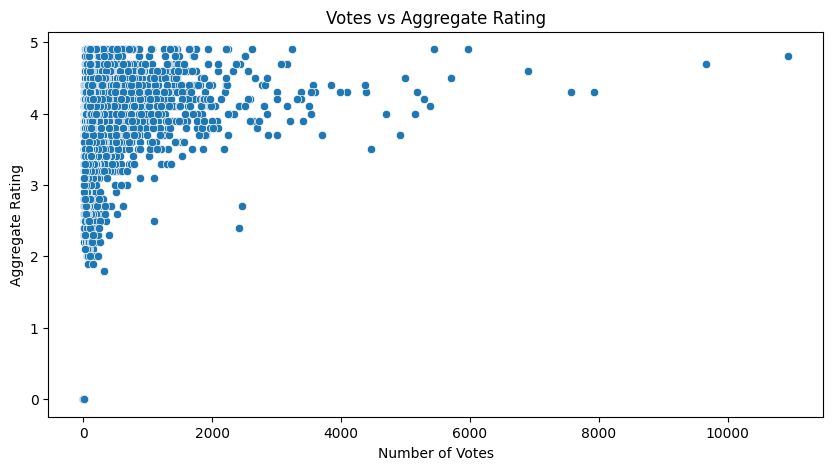

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=data['Votes'], y=data['Aggregate rating'])
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.title("Votes vs Aggregate Rating")
plt.show()


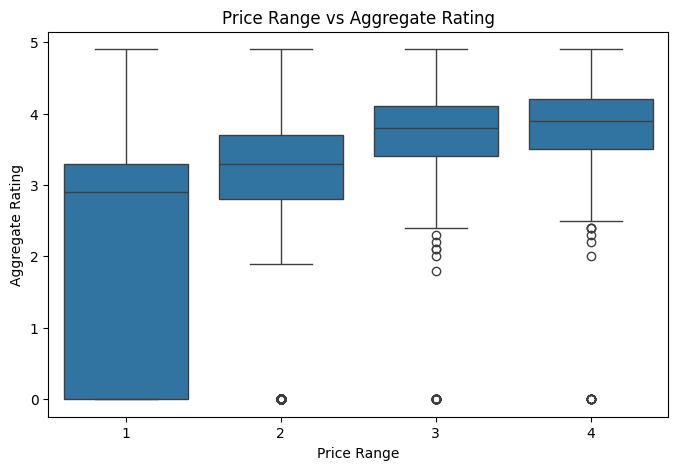

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Price range'], y=data['Aggregate rating'])
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.title("Price Range vs Aggregate Rating")
plt.show()


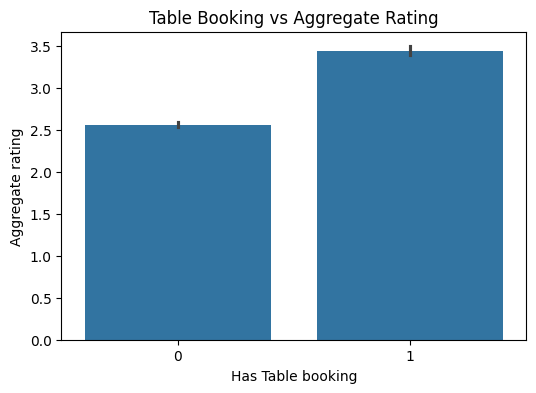

In [42]:
plt.figure(figsize=(6,4))
sns.barplot(x=data['Has Table booking'], y=data['Aggregate rating'])
plt.title("Table Booking vs Aggregate Rating")
plt.show()


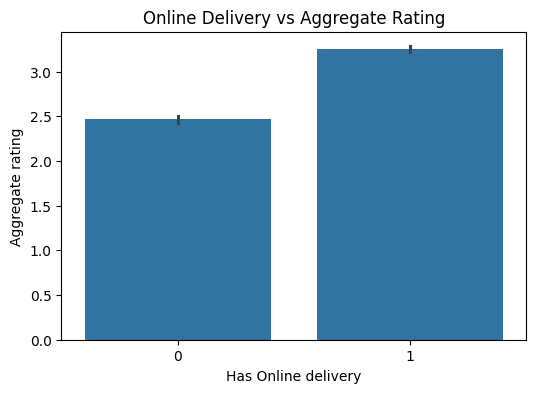

In [43]:
plt.figure(figsize=(6,4))
sns.barplot(x=data['Has Online delivery'], y=data['Aggregate rating'])
plt.title("Online Delivery vs Aggregate Rating")
plt.show()
